# Image Classification Using CNN

This notebook implements a Convolutional Neural Network (CNN) for image classification using the CIFAR-10 dataset with PyTorch.

## 1. Import Required Libraries

Import all necessary libraries including NumPy, PIL, PyTorch, and torchvision.

In [1]:
import numpy as np
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision 
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

## 2. Data Preprocessing and Transformations

Define image transformations including tensor conversion and normalization for the CIFAR-10 dataset.

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

## 3. Load CIFAR-10 Dataset

Download and load the CIFAR-10 training and testing datasets with applied transformations.

In [3]:
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# CIFAR-10 class names
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print(f"Training samples: {len(train_data)}")
print(f"Test samples: {len(test_data)}")
print(f"Number of classes: {len(classes)}")
print(f"Classes: {classes}")

100.0%



Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Training samples: 50000
Test samples: 10000
Number of classes: 10
Classes: ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
Training samples: 50000
Test samples: 10000
Number of classes: 10
Classes: ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


## 4. Create Data Loaders

Create PyTorch data loaders for efficient batch processing during training and testing.

In [4]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False, num_workers=2)

print(f"Number of training batches: {len(train_loader)}")
print(f"Number of test batches: {len(test_loader)}")

image, label = train_data[0]
image.size()
torch.Size([3, 32, 32])  # Image size: 3 channels, 32x32 pixels

Number of training batches: 1563
Number of test batches: 313


torch.Size([3, 32, 32])

## 5. Define CNN Model Architecture

Create a convolutional neural network class with layers for image classification.

In [10]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        # First convolutional block
        self.conv1 = nn.Conv2d(3, 12, 5) # Changed to 12 filters and kernel size 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        # Second convolutional block
        self.conv2 = nn.Conv2d(12, 24, 5) # Changed to 24 filters and kernel size 5)
        
        # Fully connected layers
        self.fc1 = nn.Linear(24 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # Output layer for 10 classes
        
    def forward(self, x):
        # Convolutional layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

## 6. Set Up Training Parameters

Configure loss function, optimizer, learning rate, and other training hyperparameters.

In [11]:
# Initialize the model
model = CNN()

print(f"Model: {model}")

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

Model: CNN(
  (conv1): Conv2d(3, 12, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 24, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=600, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## 7. Training Loop Implementation

Implement the training loop with forward pass, loss calculation, and backpropagation.

In [12]:
for epoch in range(30):
    print(f'Training epoch {epoch}...')

    running_loss = 0.0

    for i, data in enumerate(train_loader):
        inputs, labels = data
        
        optimizer.zero_grad()

        ouputs = model(inputs)

        loss = loss_function(ouputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    print(f"Loss: {running_loss / len(train_loader):.4f}")

Training epoch 0...
Loss: 2.2213
Training epoch 1...
Loss: 2.2213
Training epoch 1...
Loss: 1.7687
Training epoch 2...
Loss: 1.7687
Training epoch 2...
Loss: 1.5153
Training epoch 3...
Loss: 1.5153
Training epoch 3...
Loss: 1.3872
Training epoch 4...
Loss: 1.3872
Training epoch 4...
Loss: 1.2913
Training epoch 5...
Loss: 1.2913
Training epoch 5...
Loss: 1.2093
Training epoch 6...
Loss: 1.2093
Training epoch 6...
Loss: 1.1363
Training epoch 7...
Loss: 1.1363
Training epoch 7...
Loss: 1.0687
Training epoch 8...
Loss: 1.0687
Training epoch 8...
Loss: 1.0193
Training epoch 9...
Loss: 1.0193
Training epoch 9...
Loss: 0.9742
Training epoch 10...
Loss: 0.9742
Training epoch 10...
Loss: 0.9322
Training epoch 11...
Loss: 0.9322
Training epoch 11...
Loss: 0.8955
Training epoch 12...
Loss: 0.8955
Training epoch 12...
Loss: 0.8595
Training epoch 13...
Loss: 0.8595
Training epoch 13...
Loss: 0.8297
Training epoch 14...
Loss: 0.8297
Training epoch 14...
Loss: 0.7965
Training epoch 15...
Loss: 0.7965

In [13]:
torch.save(model.state_dict(), 'cnn_model.pth')

In [14]:
model = CNN()
model.load_state_dict(torch.load('cnn_model.pth'))

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_26792\2767356395.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('cnn_model.pth'))


<All keys matched successfully>

## 8. Model Evaluation

Evaluate the trained model on test data and calculate accuracy metrics.

In [15]:
correct = 0
total = 0
model.eval()

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Overall accuracy
overall_accuracy = 100 * correct / total
print(f'Overall Test Accuracy: {overall_accuracy:.2f}%')

Overall Test Accuracy: 69.36%


## 9. Testing

Test the model on random images of your choice

In [21]:
new_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = new_transform(image)
    image = image.unsqueeze(0)  # Add batch dimension
    return image    

image_paths = ['frog.jpg', 'deer.jpg', 'plane.jpg', 'deer2.jpg']  # Replace with your image paths
images = [load_image(img) for img in image_paths]

model.eval()
with torch.no_grad():
    for img in images:
        outputs = model(img)
        _, predicted = torch.max(outputs, 1)
        print(f'Predicted class: {classes[predicted.item()]}')



Predicted class: frog
Predicted class: plane
Predicted class: plane
Predicted class: deer


## 10. Visualize Results

Display sample predictions

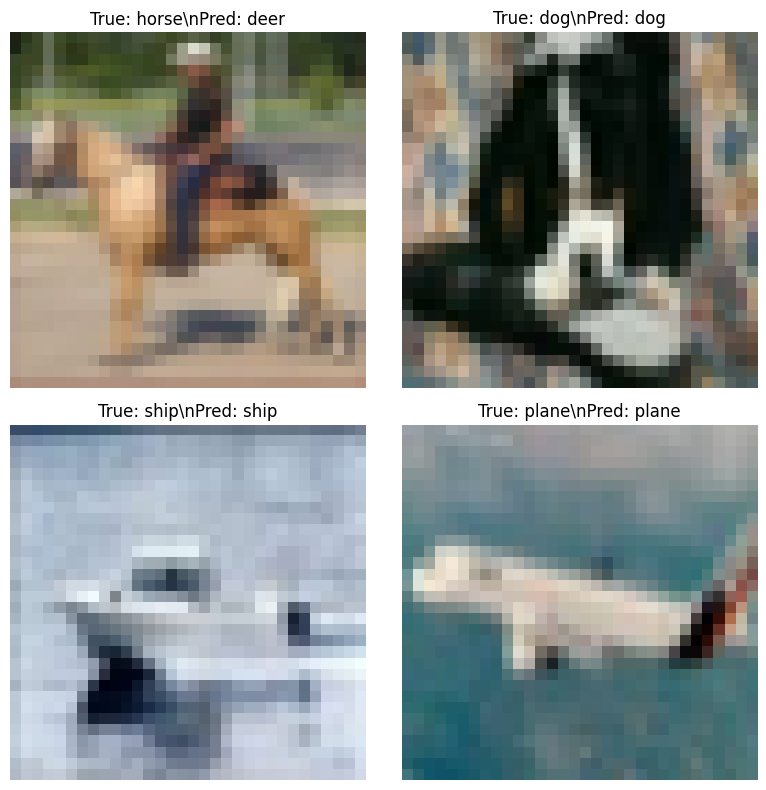

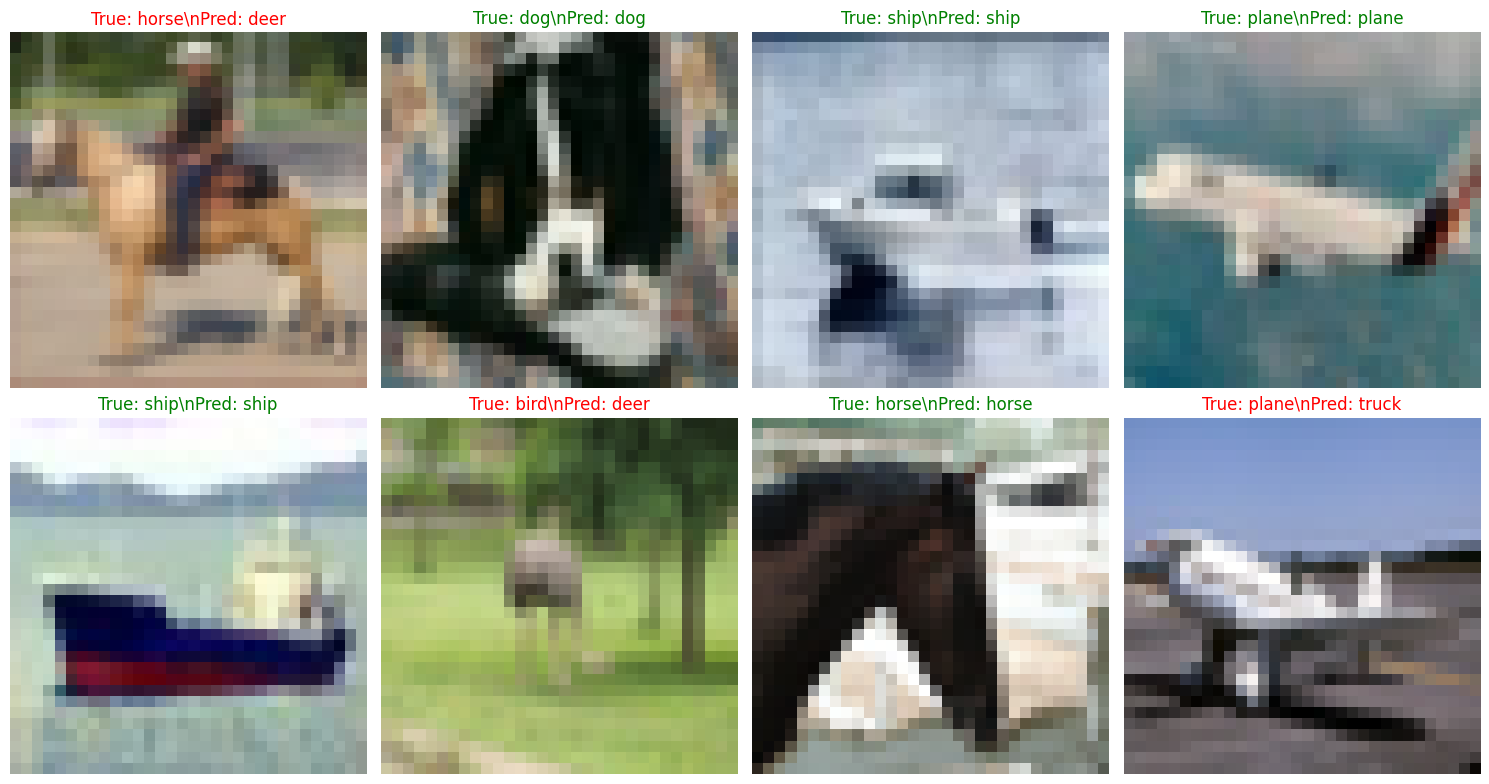

In [23]:
# Sample predictions
model.eval()
with torch.no_grad():
    data_iter = iter(test_loader)
    images, labels = next(data_iter)
    images, labels = data
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    
    # Show first 4 predictions
    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        if i < 4:
            img = images[i].cpu() / 2 + 0.5  
            img = np.transpose(img, (1, 2, 0))
            ax.imshow(img)
            ax.set_title(f'True: {classes[labels[i]]}\\nPred: {classes[predicted[i]]}')
            ax.axis('off')

plt.tight_layout()
plt.show()

# Function to visualize sample predictions
def visualize_predictions(model, test_loader, num_images=8):
    model.eval()
    images_shown = 0
    
    plt.figure(figsize=(15, 8))
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            
            for i in range(min(images.size(0), num_images - images_shown)):
                plt.subplot(2, 4, images_shown + 1)
                
                # Denormalize image
                img = images[i].cpu() / 2 + 0.5
                img = np.transpose(img, (1, 2, 0))
                
                plt.imshow(img)
                color = 'green' if predicted[i] == labels[i] else 'red'
                plt.title(f'True: {classes[labels[i]]}\\nPred: {classes[predicted[i]]}', color=color)
                plt.axis('off')
                
                images_shown += 1
                if images_shown >= num_images:
                    break
            
            if images_shown >= num_images:
                break
    
    plt.tight_layout()
    plt.show()

visualize_predictions(model, test_loader)